## Handwritten digit recognition using deep learning
### MLP and Keras
### Edgar Acuna
### February 2022

In [20]:
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dense
from keras.activations import hard_sigmoid
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load the data
(X_train, Y_train), (X_test, Y_test) =keras.datasets.mnist.load_data()
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


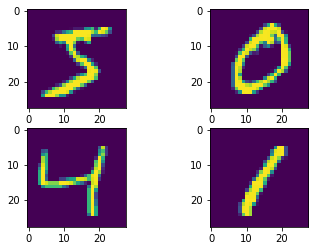

In [22]:
# normalize x
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.
# we reserve the last 10000 training examples for validation
X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = Y_train[:-10000],Y_train[-10000:]
# prepare image and figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(X_train[0])
ax2.imshow(X_train[1])
ax3.imshow(X_train[2])
ax4.imshow(X_train[3])

In [23]:
# Configuration options
feature_vector_length = 784
num_classes = 10

In [24]:
# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

In [25]:
# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


In [26]:
# Create the neural network with two hidden layers. The first one with 350 neurons and the second one with 50 neurons
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 350)               274750    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                17550     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 292,810
Trainable params: 292,810
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/10
160/160 [==============================] - 1s 6ms/step - loss: 0.4194 - accuracy: 0.8810 - val_loss: 0.2342 - val_accuracy: 0.9315
Epoch 2/10
160/160 [==============================] - 1s 5ms/step - loss: 0.1549 - accuracy: 0.9550 - val_loss: 0.1628 - val_accuracy: 0.9509
Epoch 3/10
160/160 [==============================] - 1s 5ms/step - loss: 0.1037 - accuracy: 0.9704 - val_loss: 0.1378 - val_accuracy: 0.9594
Epoch 4/10
160/160 [==============================] - 1s 5ms/step - loss: 0.0776 - accuracy: 0.9775 - val_loss: 0.1203 - val_accuracy: 0.9634
Epoch 5/10
160/160 [==============================] - 1s 5ms/step - loss: 0.0559 - accuracy: 0.9839 - val_loss: 0.1092 - val_accuracy: 0.9672
Epoch 6/10
160/160 [==============================] - 1s 6ms/step - loss: 0.0437 - accuracy: 0.9876 - val_loss: 0.1156 - val_accuracy: 0.9675
Epoch 7/10
160/160 [==============================] - 1s 5ms/step - loss: 0.0352 - accuracy: 0.9902 - val_loss: 0.1132 - val_accuracy: 0.9672
Epoch 

In [28]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.9784
Test results - Loss: 0.07198132574558258 - Accuracy: 0.9783999919891357%
